In [1]:
from som_model import *
from matplotlib import pyplot as plt
import numpy as np
from random import shuffle
import os


In [2]:
# First we test the neuron building block
my_som_neuron = SOMNeuron(20)
print("SOM Neuron weights: ",  my_som_neuron.weights)
print("SOM Neuron weights norm:",  np.linalg.norm(my_som_neuron.weights))
print("SOM Neuron post-activation: ", my_som_neuron.post_activation)


SOM Neuron weights:  [[-0.3632845 ]
 [-0.50717434]
 [-0.08113242]
 [ 0.08103687]
 [ 0.05126873]
 [ 0.1475127 ]
 [ 0.23298352]
 [-0.16295635]
 [-0.04394227]
 [-0.34787156]
 [ 0.12151467]
 [ 0.08930114]
 [ 0.4303215 ]
 [-0.13129245]
 [-0.25497587]
 [-0.02765177]
 [-0.02508646]
 [ 0.2048006 ]
 [ 0.06073948]
 [-0.17968019]]
SOM Neuron weights norm: 1.0
SOM Neuron post-activation:  [[0.]]


In [3]:
# Now we build a SOM Network of dimensions 5x5
rand_seed = 10
np.random.seed(rand_seed) #freeze random number generation initial state
my_som_net = SOMNetwork([5, 5], 3) 
print("Object matrix that stores network neurons: ", my_som_net.neurons) 
print("SOM network dimensions: ", my_som_net.grid_dimensions) 
print("Let's see a single neuron weights: ", my_som_net.neurons[0,0].weights)


Object matrix that stores network neurons:  [[<som_model.SOMNeuron object at 0x7ace9b5bd430>
SOM network dimensions:  [5, 5]
Let's see a single neuron weights:  [[ 0.61598635]
 [ 0.33088506]
 [-0.71489572]]


In [8]:
# Lista de arquivos de imagem para treinamento (pré e pós queimadas)
image_paths = [
    "img/bmp/pre_queimada.bmp",
    "img/bmp/pre_queimada_rgb.bmp",
    "img/bmp/pos_queimada.bmp",
    "img/bmp/S2_L2A_pre_queimada.bmp",
    "img/bmp/S2_L2A_pos_queimada.bmp",
    "img/bmp/cicatriz_do_fogo_rgb.bmp"
]


In [9]:
# Acumulador de amostras vetorizadas
X_in = []
labels = []

# Processar todas as imagens listadas
for path in image_paths:
    print(f"Carregando: {path}")
    img = plt.imread(path)
    print("Shape:", img.shape)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j][:3]  # RGB apenas
            norm = np.linalg.norm(pixel)
            if norm == 0:
                continue
            x_in = ((pixel / norm) - 0.5) * 2
            X_in.append(x_in)
            labels.append(path)  # label do arquivo de origem

print(f"Total de vetores de entrada: {len(X_in)}")


Carregando: img/bmp/pre_queimada.bmp
Shape: (271, 265, 4)
Carregando: img/bmp/pre_queimada_rgb.bmp
Shape: (343, 311, 4)
Carregando: img/bmp/pos_queimada.bmp
Shape: (258, 260, 4)
Carregando: img/bmp/S2_L2A_pre_queimada.bmp
Shape: (161, 174, 4)
Carregando: img/bmp/S2_L2A_pos_queimada.bmp
Shape: (147, 151, 4)
Carregando: img/bmp/cicatriz_do_fogo_rgb.bmp
Shape: (301, 349, 4)
Total de vetores de entrada: 400828


In [10]:
# Definição da função de vizinhança
def neighbor_fcn(wnx, wny, x, y, sigma):
    return np.exp(- ((wnx-x)**2 + (wny-y)**2)/(2*sigma**2))

# Teste da função
print("winning neuron factor: ", neighbor_fcn(1,1,1,1,1))
print("nearby neuron factor: ", neighbor_fcn(1,1,0,1,1))
print("far away neuron factor: ", neighbor_fcn(1,1,9,9,1))


winning neuron factor:  1.0
nearby neuron factor:  0.6065306597126334
far away neuron factor:  1.603810890548638e-28


In [12]:
# Parâmetros
eta = 1.0
sigma = 1.0
n_epochs = 100
decay_every = 50
decay_factor = 0.8

data_idx = list(range(len(X_in)))
for epoch in range(n_epochs):  
    shuffle(data_idx)
    print("Epoch:", epoch)

    if epoch > 0 and (epoch % decay_every == 0):
        sigma *= decay_factor
        eta *= decay_factor

    for i in data_idx:
        x_vec = X_in[i].reshape(-1, 1)
        my_som_net.organize(x_vec, eta, neighbor_fcn, sigma)
        if i % 50000 == 0:
            print(i, "/", len(X_in))


Epoch: 0
400000 / 400828
200000 / 400828
0 / 400828
100000 / 400828
300000 / 400828
250000 / 400828
150000 / 400828
50000 / 400828
350000 / 400828
Epoch: 1
350000 / 400828
0 / 400828
200000 / 400828
300000 / 400828
250000 / 400828
50000 / 400828
100000 / 400828
400000 / 400828
150000 / 400828
Epoch: 2
0 / 400828
200000 / 400828
100000 / 400828
250000 / 400828
300000 / 400828
50000 / 400828
400000 / 400828
150000 / 400828
350000 / 400828
Epoch: 3
250000 / 400828
150000 / 400828
350000 / 400828
400000 / 400828
50000 / 400828
300000 / 400828
100000 / 400828
200000 / 400828
0 / 400828
Epoch: 4
50000 / 400828
200000 / 400828
300000 / 400828
250000 / 400828
150000 / 400828
350000 / 400828
400000 / 400828
0 / 400828
100000 / 400828
Epoch: 5
50000 / 400828
0 / 400828
250000 / 400828
100000 / 400828
150000 / 400828
400000 / 400828
200000 / 400828
350000 / 400828
300000 / 400828
Epoch: 6
0 / 400828
50000 / 400828
300000 / 400828
200000 / 400828
250000 / 400828
350000 / 400828
150000 / 400828
100

Text(0.5, 1.0, 'Trained neural network grid representation')

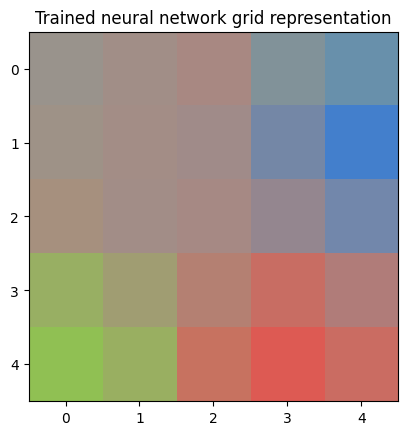

In [13]:
# Image representation after training
nnet_img_repr_trained = np.zeros((my_som_net.grid_dimensions[0], my_som_net.grid_dimensions[1], 3), dtype=np.uint8)
RGBMAX = 255
for i in range(my_som_net.grid_dimensions[0]):
    for j in range(my_som_net.grid_dimensions[1]):
        weight = my_som_net.neurons[i, j].weights.flatten()
        nnet_img_repr_trained[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)

plt.figure()
plt.imshow(nnet_img_repr_trained)
plt.title("Trained neural network grid representation")


Text(0.5, 1.0, 'Segmented image (last input)')

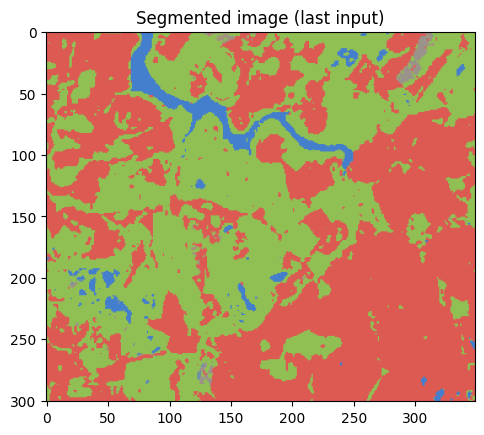

In [14]:
# Segmentação da última imagem
img = plt.imread(image_paths[-1])  # usamos a última imagem como teste
segmented_image = np.zeros((len(img), len(img[0]), 3), dtype=np.uint8)
nn_grid = np.zeros((len(my_som_net.neurons), len(my_som_net.neurons[0])))

for i in range(len(img)):
    for j in range(len(img[0])):
        pixel = img[i, j][:3]
        norm = np.linalg.norm(pixel)
        if norm == 0:
            continue
        x_in = ((pixel / norm) - 0.5) * 2
        for k in range(my_som_net.grid_dimensions[0]):
            for l in range(my_som_net.grid_dimensions[1]):
                nn_grid[k,l]= np.dot(x_in.flatten(), my_som_net.neurons[k,l].weights.flatten())

        winning_neuron_max_flat_idx = np.argmax(nn_grid)
        wnx, wny = np.unravel_index(winning_neuron_max_flat_idx, nn_grid.shape)
        weight = my_som_net.neurons[wnx, wny].weights.flatten()
        segmented_image[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)

plt.figure()
plt.imshow(segmented_image)
plt.title("Segmented image (last input)")


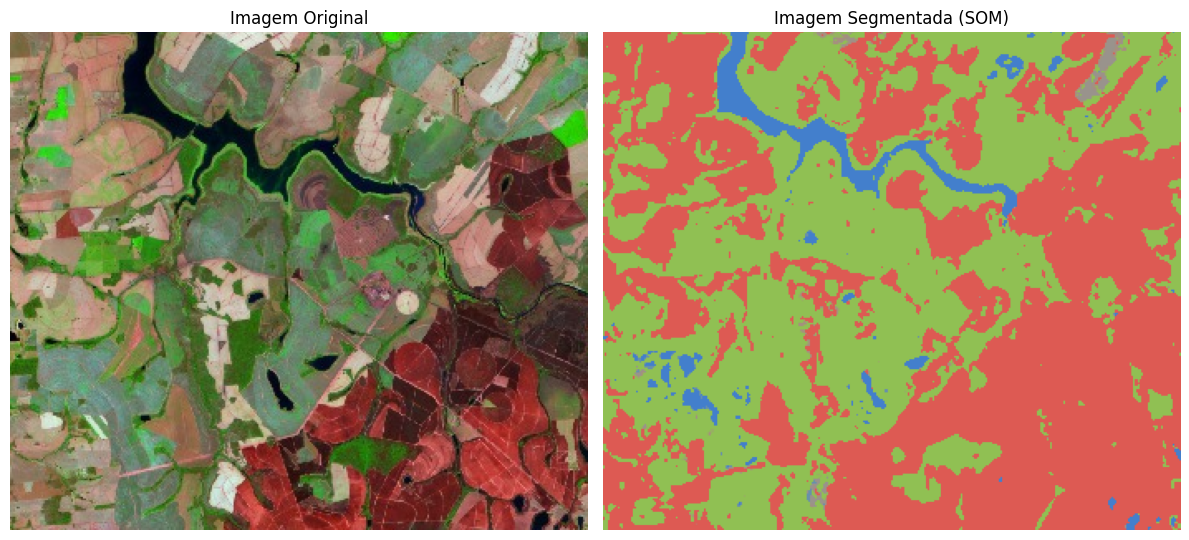

In [15]:
import matplotlib.pyplot as plt

# Imagem original
img_original = plt.imread(image_paths[-1])

# Exibe as duas imagens lado a lado
plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.title("Imagem Original")
plt.axis('off')

# Segmentada
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Imagem Segmentada (SOM)")
plt.axis('off')

plt.tight_layout()
plt.show()
